In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_dir = '/content/drive/MyDrive/archive (4)/Split_smol/train'
validation_data_dir = '/content/drive/MyDrive/archive (4)/Split_smol/val'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,          # Rotate images randomly by up to 40 degrees
    width_shift_range=0.3,      # Shift images horizontally by up to 30% of the width
    height_shift_range=0.3,     # Shift images vertically by up to 30% of the height
    shear_range=0.3,            # Shear transformation with a maximum shear intensity of 30%
    zoom_range=0.3,             # Zoom in randomly by up to 30%
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=True,         # Randomly flip images vertically
    brightness_range=[0.5, 1.5],# Randomly adjust brightness between 50% and 150%
    fill_mode='nearest'         # How to fill in newly created pixels during augmentation
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 681 images belonging to 9 classes.
Found 181 images belonging to 9 classes.


In [ ]:
# Define the number of classes (types of skin diseases)
num_classes = 9  # Assuming you have 9 different types of skin diseases

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the model architecture
image_height = 224  # Define the height of your input images
image_width = 224   # Define the width of your input images

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # Apply L2 regularization
    Dropout(0.5),  # Apply dropout regularization with a rate of 0.5
    Dense(num_classes, activation='softmax')
])






In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)



Epoch 1/50
22/22 [==============================] - 561s 25s/step - loss: 2.7630 - accuracy: 0.1615 - val_loss: 2.3949 - val_accuracy: 0.2155
Epoch 2/50
22/22 [==============================] - 117s 5s/step - loss: 2.3263 - accuracy: 0.2070 - val_loss: 2.2102 - val_accuracy: 0.1878
Epoch 3/50
22/22 [==============================] - 112s 5s/step - loss: 2.0948 - accuracy: 0.2467 - val_loss: 2.0058 - val_accuracy: 0.2928
Epoch 4/50
22/22 [==============================] - 108s 5s/step - loss: 2.0685 - accuracy: 0.2217 - val_loss: 2.0027 - val_accuracy: 0.2541
Epoch 5/50
22/22 [==============================] - 113s 5s/step - loss: 1.9259 - accuracy: 0.2540 - val_loss: 1.8613 - val_accuracy: 0.3204
Epoch 6/50
22/22 [==============================] - 111s 5s/step - loss: 1.9379 - accuracy: 0.2467 - val_loss: 1.9583 - val_accuracy: 0.2983
Epoch 7/50
22/22 [==============================] - 112s 5s/step - loss: 1.9151 - accuracy: 0.2775 - val_loss: 1.7587 - val_accuracy: 0.3149
Epoch 8/50
2

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation accuracy:", accuracy)

6/6 [==============================] - 9s 1s/step - loss: 1.6331 - accuracy: 0.4199
Validation accuracy: 0.41988950967788696


In [ ]:
model.save(r"C:\Users\D. Dilsha Singh\OneDrive\Desktop\hackathon\hackathon1.keras")


In [ ]:
model.save('/content/drive/My Drive/hackathon1.keras')

In [ ]:
model.save('/content/drive/My Drive/hackathon1.h5')

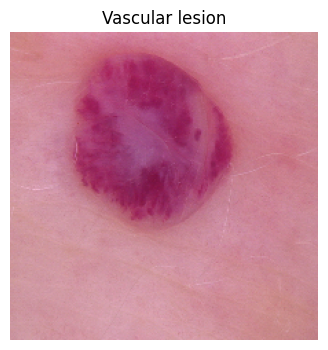

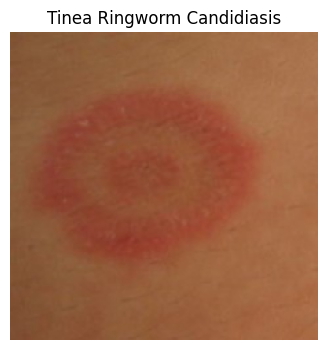

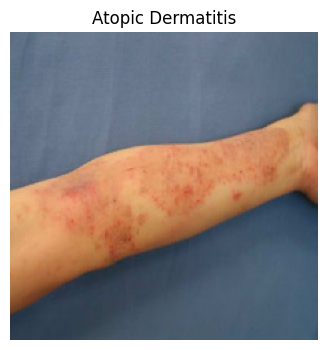

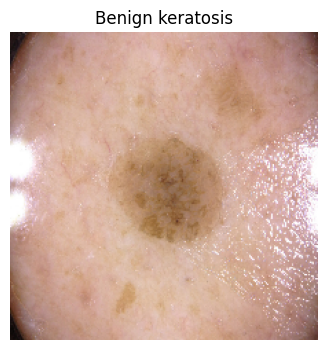

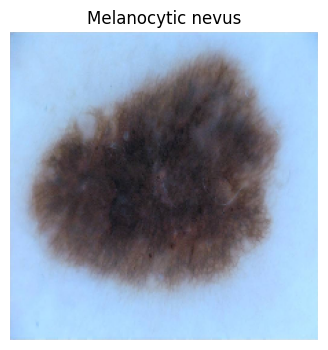

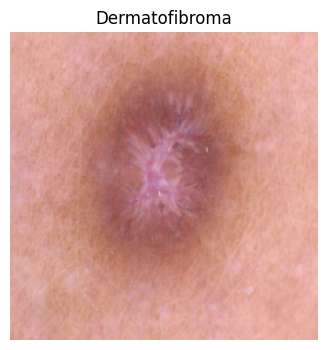

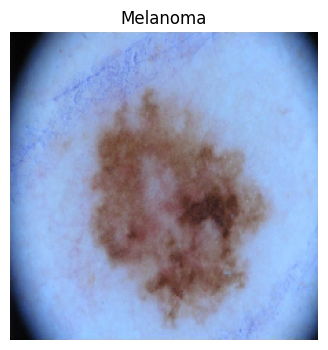

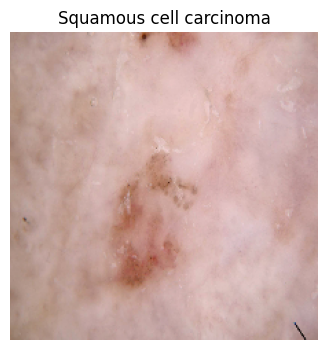

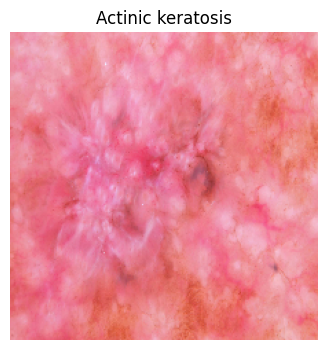

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Directory containing the folders for each disease class
data_dir = "/content/drive/MyDrive/archive (4)/Split_smol/train"

# Get the list of subdirectories (each subdirectory represents a disease class)
class_folders = os.listdir(data_dir)

# Define the fixed size for displaying each image
fixed_width = 224
fixed_height = 224

# Display the first image from each class
for class_folder in class_folders:
    # Get the path to the folder containing images for the current class
    class_folder_path = os.path.join(data_dir, class_folder)

    # Get the list of image files in the current class folder
    image_files = os.listdir(class_folder_path)

    # Sort the list of image files to ensure consistent order
    image_files.sort()

    if len(image_files) > 0:
        # Load the first image from the current class
        first_image_path = os.path.join(class_folder_path, image_files[0])
        img = image.load_img(first_image_path, target_size=(fixed_height, fixed_width))

        # Display the image with the class name
        plt.figure(figsize=(4, 4))  # Adjust figure size as needed
        plt.imshow(img)
        plt.title(class_folder)
        plt.axis('off')  # Turn off axis
        plt.show()
    else:
        print(f"No images found in {class_folder}")


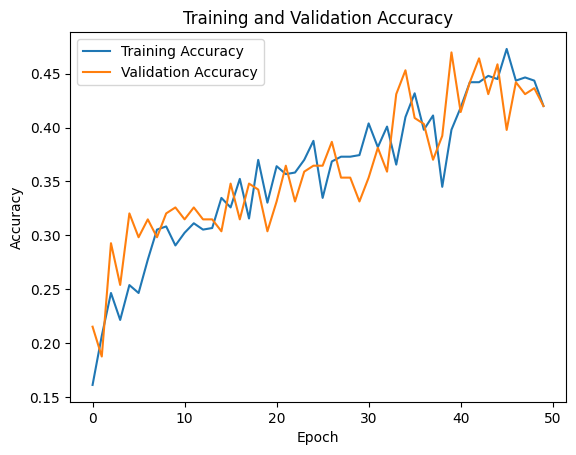

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined